In [104]:
# Import needed libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
#Load the data
data_url = 'https://raw.githubusercontent.com/nick-edu/dmmldl/master/MobilePrice.csv'
#raise a try except block
try:
    df = pd.read_csv(data_url)
except:
    print("Error loading dataset")

1.1 Exploratory Data Analysis (EDA)

In [10]:
#Counting columns
len(df.columns)

21

In [11]:
#Counting rows
len(df.index)

2000

In [12]:
#Counting missing values in the dataframe
df.isnull().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
internal_memory    0
depth              0
width              0
n_cores            0
primary_camera     0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

VISUALIZATING DATA

<AxesSubplot: >

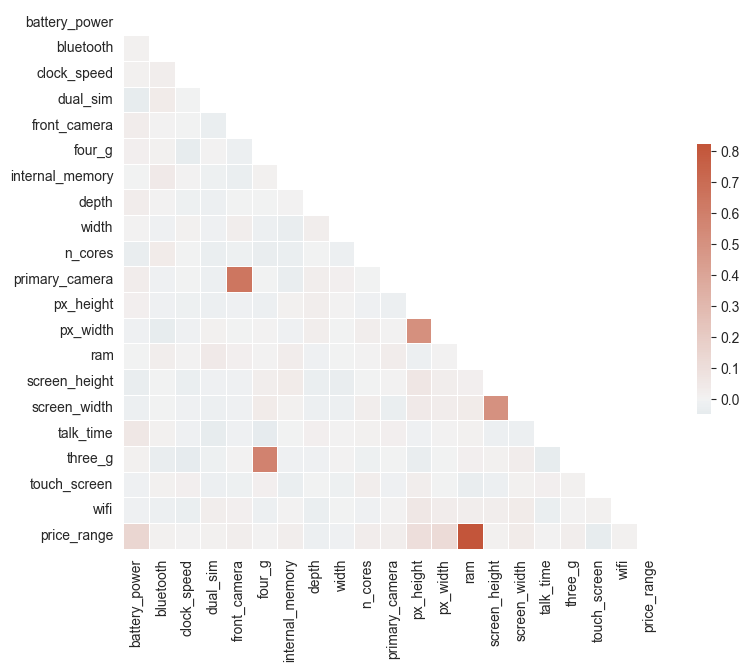

In [28]:
#Looking for relationships in the Dataset
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(9, 7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: xlabel='px_height', ylabel='px_width'>

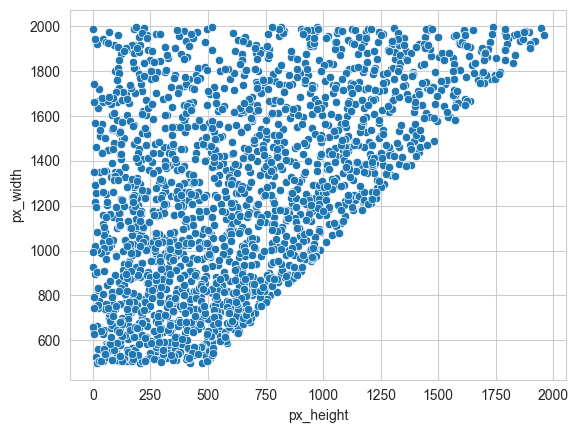

In [89]:
#Scatter plot ram vs batter power
sns.scatterplot(data=df, x="px_height", y="px_width")

<AxesSubplot: xlabel='screen_height', ylabel='count'>

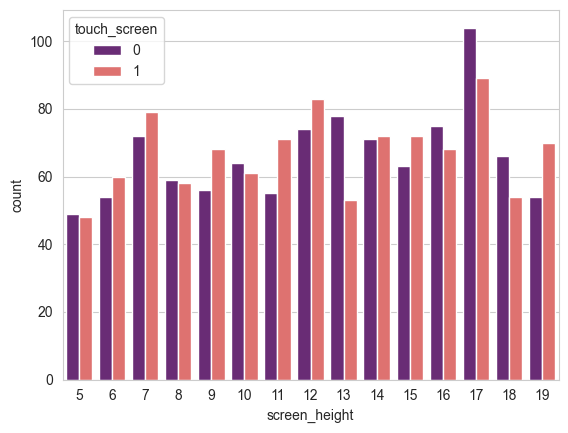

In [80]:
#Barplot counting screen_height hue touch_screen.
sns.countplot(x = "screen_height", hue = "touch_screen", data = df, palette = 'magma')

<AxesSubplot: xlabel='n_cores', ylabel='clock_speed'>

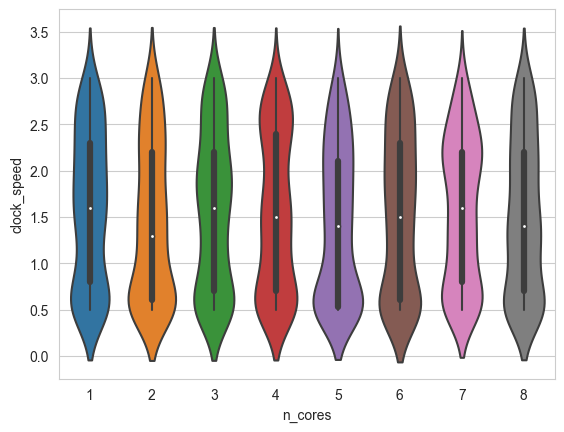

In [18]:
#Violin plot n_cores vs clock_speed
sns.violinplot(data=df, y="clock_speed", x="n_cores")

<AxesSubplot: xlabel='price_range', ylabel='ram'>

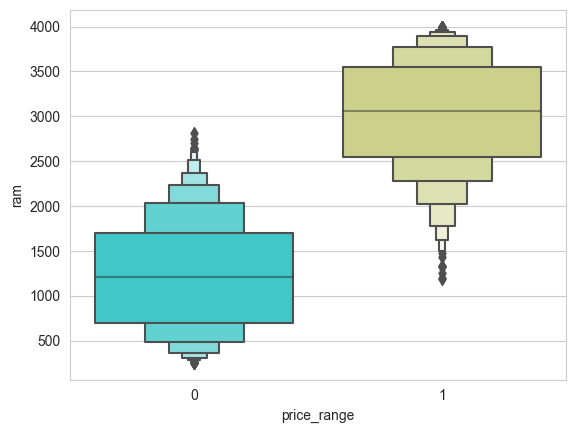

In [19]:
#Boxplot price range vs ram
sns.boxenplot(x='price_range', y='ram', data=df, palette='rainbow')

<AxesSubplot: xlabel='primary_camera', ylabel='front_camera'>

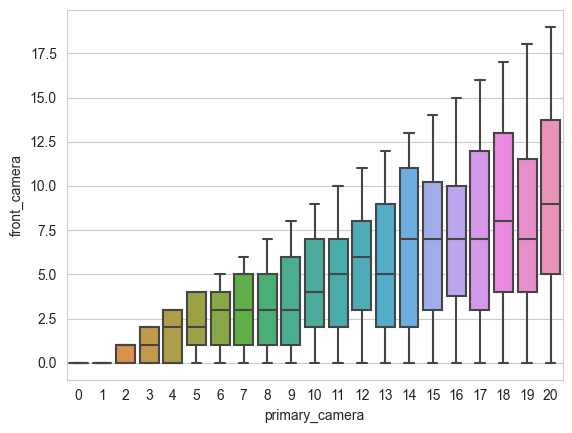

In [27]:
#Box plot relationship between the pixels of  the primary camera vs front camera
sns.boxplot(x='primary_camera', y ='front_camera',data=df)

1.2 Clustering

In [21]:
#Look over the data
df.head(5)

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,internal_memory,depth,width,n_cores,...,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [99]:
#K-means method
selected_columns = ['px_height', 'px_width']
selected_data = df[selected_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

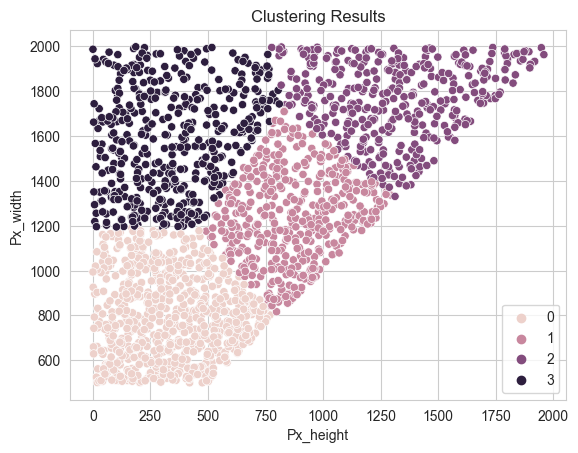

In [103]:
try:
    # Perform clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_

    # Plot the results

    sns.scatterplot(data=selected_data, x='px_height', y='px_width', hue=labels)
    plt.xlabel('Px_height')
    plt.ylabel('Px_width')
    plt.title('Clustering Results')
    plt.show()

except:
    print("Error performing clustering")

After scaling the data and plotting the Px_width and Px_height we could see clearly 4 types of mobile's resolution
0 : Low resolution phones
1 : Medium resolution phones
2. High resolution phones
3. Medium - high  resolution phones